## Grounging DINO
- SOTA **Zero-Shot Object Detection**
- Referring Expression Comprehension (REC) — Identify and localize a specific object or region within an image, based on a text description (**prompt**).
- can be optimized end-to-end without using any hard-crafted modules such as **Non-Maximum Suppression** (NMS).
- to distill large models into smaller, can use [autodistill](https://github.com/autodistill/autodistill) (train a smaller model trained on custom data, running at the edge)
### Links
- [Grounding DINO github](https://github.com/IDEA-Research/GroundingDINO) <br>
- [Grounding DINO paper](https://arxiv.org/pdf/2303.05499.pdf)

- [DINO paper](https://arxiv.org/pdf/2203.03605.pdf), [GLIP paper](https://arxiv.org/pdf/2112.03857.pdf)

## Installs and imports

In [1]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd GroundingDINO/
%pip install -qqq -e .

# download weights
%mkdir weights
%cd weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
%cd ..

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 401 (delta 58), reused 50 (delta 50), pack-reused 316
Receiving objects: 100% (401/401), 12.85 MiB | 23.16 MiB/s, done.
Resolving deltas: 100% (204/204), done.
/kaggle/working/GroundingDINO
Note: you may need to restart the kernel to use updated packages.
/kaggle/working/GroundingDINO/weights
/kaggle/working/GroundingDINO


In [2]:
%ls

LICENSE    build/  groundingdino/           requirements.txt  test.ipynb
README.md  demo/   groundingdino.egg-info/  setup.py          weights/


In [3]:
import os
from glob import glob

import cv2
import matplotlib.pyplot as plt

from groundingdino.util.inference import load_model, load_image, predict, annotate

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Create model & load image

In [4]:
model = load_model("groundingdino/config/GroundingDINO_SwinT_OGC.py", "weights/groundingdino_swint_ogc.pth")

/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [5]:
FLOOD_DS_ROOT = '/kaggle/input/flood-area-segmentation'
image_files = sorted(glob(FLOOD_DS_ROOT+"/Image/*"))
len(image_files)

290

In [71]:
TEXT_PROMPT = "flood . houses . helicopter shadow"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(image_files[7])

## Predict and visualize bboxes

In [72]:
%%time

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

CPU times: user 269 ms, sys: 388 µs, total: 269 ms
Wall time: 276 ms


In [73]:
boxes

tensor([[0.6683, 0.7320, 0.2686, 0.3259],
        [0.4998, 0.4990, 0.9936, 0.9921],
        [0.2019, 0.4036, 0.3997, 0.8026]])

In [74]:
phrases

['helicopter shadow', 'flood', 'houses']

In [75]:
logits

tensor([0.5903, 0.5331, 0.4099])

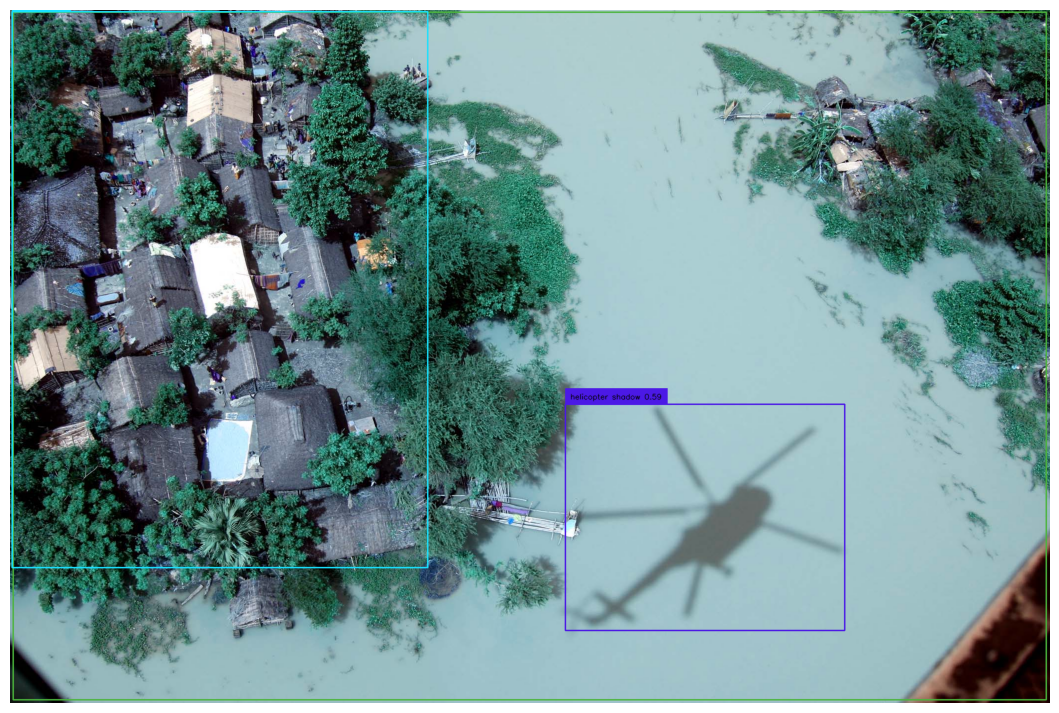

In [76]:
plt.figure(figsize=(16,9))
plt.axis('off')
plt.imshow(annotated_frame);